In [1]:
import pandas as pd

In [2]:
import quandl

In [4]:
import pickle

In [5]:
import matplotlib.pyplot as plt

In [7]:
from matplotlib import style

In [8]:
style.use('fivethirtyeight')

In [9]:
api_key = open('quandlapikey.txt','r').read()
def state_list():
    fiddy_states = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states')#read data from html page
    return fiddy_states[0][0][1:]# selecting first table of html page
    

def grab_initial_state_data():
    states = state_list()

    main_df = pd.DataFrame()

    for abbv in states:
        query = "FMAC/HPI_"+str(abbv)
        df = quandl.get(query, authtoken=api_key)
        df.rename(columns={'Value':str(abbv)}, inplace=True)#its done because of value error
        print(query)
        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df)
    pickle_out = open('fiddy_states.pickle','wb')#wb stands for write bytes
    pickle.dump(main_df, pickle_out)
    pickle_out.close()        

    
grab_initial_state_data()

FMAC/HPI_AL
FMAC/HPI_AK
FMAC/HPI_AZ
FMAC/HPI_AR
FMAC/HPI_CA
FMAC/HPI_CO
FMAC/HPI_CT
FMAC/HPI_DE
FMAC/HPI_FL
FMAC/HPI_GA
FMAC/HPI_HI
FMAC/HPI_ID
FMAC/HPI_IL
FMAC/HPI_IN
FMAC/HPI_IA
FMAC/HPI_KS
FMAC/HPI_KY
FMAC/HPI_LA
FMAC/HPI_ME
FMAC/HPI_MD
FMAC/HPI_MA
FMAC/HPI_MI
FMAC/HPI_MN
FMAC/HPI_MS
FMAC/HPI_MO
FMAC/HPI_MT
FMAC/HPI_NE
FMAC/HPI_NV
FMAC/HPI_NH
FMAC/HPI_NJ
FMAC/HPI_NM
FMAC/HPI_NY
FMAC/HPI_NC
FMAC/HPI_ND
FMAC/HPI_OH
FMAC/HPI_OK
FMAC/HPI_OR
FMAC/HPI_PA
FMAC/HPI_RI
FMAC/HPI_SC
FMAC/HPI_SD
FMAC/HPI_TN
FMAC/HPI_TX
FMAC/HPI_UT
FMAC/HPI_VT
FMAC/HPI_VA
FMAC/HPI_WA
FMAC/HPI_WV
FMAC/HPI_WI
FMAC/HPI_WY


In [11]:
HPI_data=pd.read_pickle('fiddy_states.pickle')

In [12]:
HPI_data

,AL,AK,AZ,AR,CA,CO,CT,DE,FL,GA,...,SD,TN,TX,UT,VT,VA,WA,WV,WI,WY
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,35.303417,34.527918,28.940032,36.838815,15.644547,19.630026,24.448197,27.122817,31.178268,30.721998,...,37.928775,32.256816,32.582514,24.537282,26.562005,27.945021,17.331629,40.881718,28.364836,31.425109
1975-02-28,35.502507,35.026256,29.409528,37.223497,15.693093,19.821180,24.978337,27.108578,32.306122,30.475086,...,37.463460,32.272559,32.956762,24.915536,26.880710,28.213562,17.437792,41.956890,28.719369,31.929642
1975-03-31,35.734654,35.536666,29.861852,37.561809,15.887119,20.013280,25.376128,27.132215,34.048244,30.372700,...,36.994328,32.335014,33.592795,25.252674,27.189255,28.419414,17.570050,43.075651,29.044479,32.459696
1975-04-30,36.015829,36.074757,30.227061,37.836285,16.203236,20.207580,25.589234,27.243265,36.262987,30.430184,...,36.533508,32.448240,34.460884,25.517926,27.471153,28.586343,17.712653,44.224846,29.310520,32.998744
1975-05-31,36.267298,36.676178,30.433976,38.086996,16.459320,20.382426,25.635869,27.469625,36.488976,30.522158,...,36.119922,32.589892,34.658289,25.694623,27.719357,28.743314,17.836880,45.371374,29.518618,33.505875
1975-06-30,36.372099,37.331373,30.409924,38.331987,16.564613,20.538040,25.579953,27.759155,34.783929,30.525906,...,35.806973,32.754949,34.159936,25.754537,27.939799,28.900575,17.966896,46.452108,29.682514,33.967067
1975-07-31,36.278301,37.987138,30.120594,38.531877,16.678888,20.647111,25.515338,28.035697,33.555738,30.403018,...,35.600066,32.936685,33.855268,25.702848,28.121733,29.100977,18.112345,47.389039,29.820097,34.389217
1975-08-31,36.043457,38.583533,29.648589,38.644881,16.910627,20.648437,25.504637,28.287205,33.005281,30.157197,...,35.449079,33.132335,33.842428,25.619391,28.242816,29.296691,18.196687,48.126994,29.953518,34.762502
1975-09-30,35.805515,39.097704,29.159975,38.643773,17.167550,20.582772,25.562230,28.512340,32.857250,29.816094,...,35.326186,33.375027,33.938596,25.602259,28.305838,29.360325,18.188687,48.611865,30.147417,35.070594


# For us, we have the Housing Price Index sampled at a one-month rate, but we could sample the HPI every week, every day, every minute, or more, but we could also resample at every year, every 10 years, and so on.

# Another environment where resampling almost always occurs is with stock prices, for example. Stock prices are intra-second. 

In [14]:
TX1yr = HPI_data['TX'].resample('A',how="mean")
print(TX1yr.head())

Date
1975-12-31    33.907977
1976-12-31    36.326228
1977-12-31    39.944588
1978-12-31    45.891938
1979-12-31    53.261870
Freq: A-DEC, Name: TX, dtype: float64


/home/fractaluser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  """Entry point for launching an IPython kernel.


# graph that is resample by year

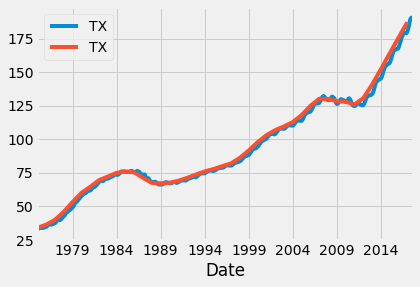

In [17]:
HPI_data['TX'].plot()
TX1yr.plot()

plt.legend()
plt.show()

# labeling of graph

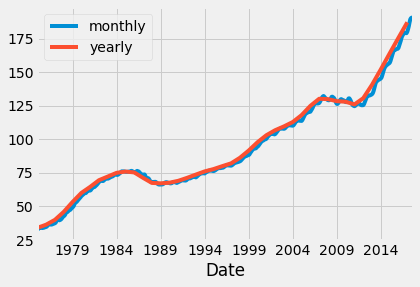

In [18]:
HPI_data['TX'].plot(label='monthly')
TX1yr.plot(label='yearly')

plt.legend()
plt.show()

# RESAMPLING BASED ON OHLC

In [19]:
TX1yr = HPI_data['TX'].resample('A',how="ohlc")
print(TX1yr.head())

                 open       high        low      close
Date                                                  
1975-12-31  32.582514  34.658289  32.582514  34.499877
1976-12-31  34.634899  37.245885  34.634899  37.245885
1977-12-31  37.413149  42.175132  37.413149  42.175132
1978-12-31  42.604946  48.754050  42.604946  48.754050
1979-12-31  49.207096  56.866162  49.207096  56.866162


/home/fractaluser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).ohlc()
  """Entry point for launching an IPython kernel.


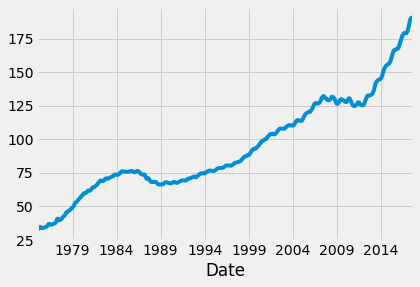

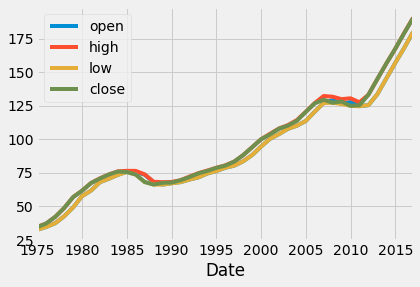

In [22]:
HPI_data['TX'].plot(label='monthly')
TX1yr.plot(label='yearly')
plt.legend()
plt.show()